Risk Prediction with Interpretable Machine Learning

1. Problem Context
Safety management in construction projects relies on understanding how workforce composition, exposure, and incidents translate into real operational risk.
In hospital construction projects, this is especially critical due to strict safety standards, high exposure hours, and the presence of vulnerable environments.

This project explores whether simple and interpretable machine learning models can provide meaningful insight into risk severity, measured through lost workdays, using historical safety data.


In [1]:
# Importing dependences
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

2. Dataset Overview

The dataset consists of monthly safety and workforce indicators from a hospital construction project.
It includes information about workforce size, gender composition, exposure hours, incident counts, and resulting lost workdays.

Each observation represents an aggregated monthly snapshot rather than individual-level data, which reflects how safety performance is typically monitored in construction projects.

In [2]:
# Loading files
df = pd.read_csv("../data/hospital_risk_data.csv")
df.head()


,month,female_workers,male_workers,total_workers,lti,nti,severe_accident,lost_days,man_hours_exposure
0,January,4,23,27,0,0,0,0,2867
1,February,7,30,37,0,0,0,0,5623
2,March,6,54,60,0,0,0,0,10560
3,April,7,78,85,0,0,0,0,15810
4,May,10,117,127,1,1,0,9,22342


3. Feature Selection and Target Definition
The target variable selected for this analysis is lost_days, which serves as a proxy for risk severity and operational impact.

The following features are used as predictors:

Workforce composition (female_workers, male_workers, total_workers)

Exposure indicators (man_hours_exposure)

Safety outcomes (lti, nti, severe_accident)

The month variable was excluded from modeling, as it does not represent a causal risk driver in this context.

In [3]:
# Features and target
df = df.drop(columns=["month"])

X = df.drop(columns=["lost_days"])
y = df["lost_days"]

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

4. Modeling Approach

Two interpretable regression models were selected to balance simplicity, transparency, and analytical value:

Linear Regression, to assess direct and additive relationships between variables.

Decision Tree Regressor, to capture non-linear interactions while maintaining human-readable logic.

The dataset was split into training and test sets to evaluate generalization behavior, acknowledging the limitations imposed by the small sample size.

4.1 Linear Regression

The Linear Regression model was used as a baseline due to its transparency and stability.
Model coefficients provide direct insight into how changes in exposure and workforce variables are associated with changes in lost workdays.

Although predictive performance is limited, this model supports interpretability and domain-driven reasoning.

In [4]:
# Linear Regression - metrics
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, r2_lr

(np.float64(15.977975347481058), 0.11355661040030407)

4.2 Decision Tree

The Decision Tree model was introduced to explore potential non-linear relationships between safety indicators and risk severity.

Tree depth was intentionally constrained to reduce overfitting. Despite this, the model demonstrated highly variable performance, highlighting its sensitivity to small datasets.

In [5]:

dt = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

rmse_dt, r2_dt

(np.float64(18.475208614068023), -0.18518518518518512)

5. Model Comparison

Model performance was evaluated using RMSE and R² metrics.

The Linear Regression model showed stable but limited predictive power, performing similarly to a baseline mean predictor.
In contrast, the Decision Tree achieved perfect test-set performance, which, in this context, signals overfitting rather than genuine predictive capability.

This comparison underscores the importance of evaluating metrics in relation to data size and structure.

In [6]:
# Model Comparison

results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "RMSE": [rmse_lr, rmse_dt],
    "R2": [r2_lr, r2_dt]
})

results

,Model,RMSE,R2
0,Linear Regression,15.977975,0.113557
1,Decision Tree,18.475209,-0.185185


6. Interpretability Analysis

Interpretability was a central objective of this analysis.

Linear Regression coefficients highlighted exposure-related variables as the primary drivers of lost workdays.

Decision Tree feature importance emphasized a narrow subset of variables, reflecting how trees can over-focus on specific patterns in limited data.

These results reinforce the value of interpretable models for safety analysis and decision support.

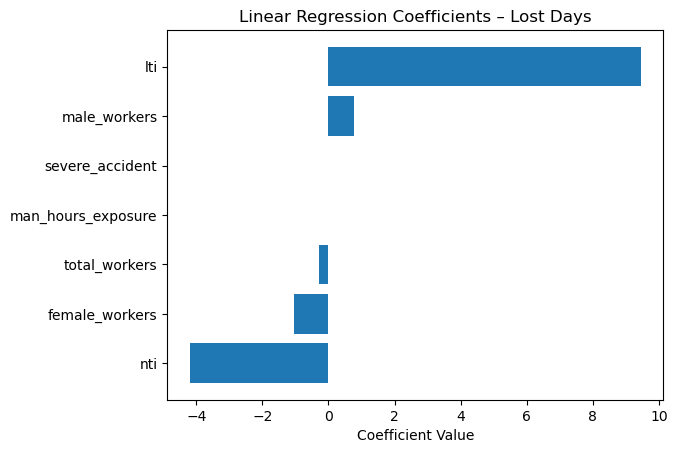

In [7]:
# Interpretability Analysis

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient")

plt.figure()
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.title("Linear Regression Coefficients – Lost Days")
plt.xlabel("Coefficient Value")
plt.show()

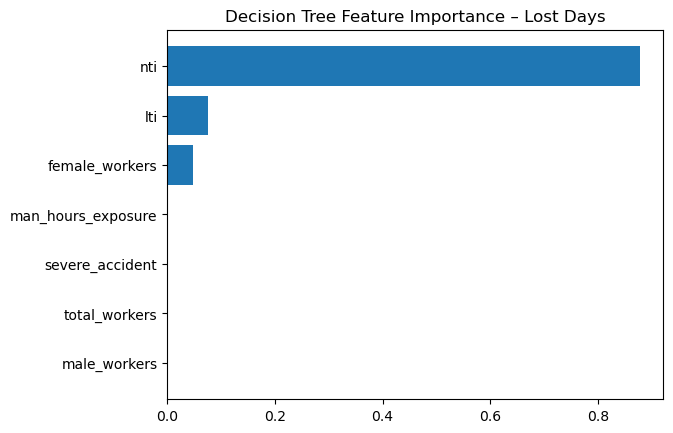

In [8]:
# desicion tree:  

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance")

plt.figure()
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.title("Decision Tree Feature Importance – Lost Days")
plt.show()

7. Limitations and Overfitting

This study is constrained by a very small dataset (10 observations) and a highly skewed target variable, with many zero values and few high-severity events.

As a result:

Performance metrics are unstable

Perfect accuracy is misleading

Overfitting risk is high, particularly for tree-based models

The analysis is therefore intended as a methodological demonstration, not a production-ready prediction system

8. Conclusions

This project demonstrates how interpretable machine learning models can be applied to safety data in a hospital construction context.

While the Decision Tree achieved perfect apparent accuracy, this result reflects overfitting rather than robust insight.
The Linear Regression model, despite lower predictive performance, provided more reliable and explainable signals aligned with domain expectations.

In safety-critical environments, model transparency, robustness, and interpretability often outweigh marginal gains in predictive accuracy.